<a href="https://colab.research.google.com/github/yagomsv/aulas_ciencia_de_dados_UFBA/blob/main/Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear

Os modelos de regressão linear fornecem uma abordagem simples para o aprendizado supervisionado. Eles são simples, mas eficazes.Linear sugere que a relação entre variável dependente e independente pode ser expressa em uma linha reta.

A regressão linear nada mais é do que uma manifestação dessa equação simples.

y = mx + c

  - y é a variável dependente, ou seja, a variável que precisa ser estimada e prevista.
  - x é a variável independente, ou seja, a variável que é controlável. É a entrada.
  - m é a inclinação. Ele determina qual será o ângulo da linha. É o parâmetro denotado como β.
   - c é a interceptação. Uma constante que determina o valor de y quando x é 0.

   Os modelos de regressão linear não são perfeitos. Ele tenta aproximar a relação entre variáveis dependentes e independentes em uma linha reta. A aproximação leva a erros. Alguns erros podem ser reduzidos. Alguns erros são inerentes à natureza do problema. Esses erros não podem ser eliminados. Eles são chamados de erro irredutível, o termo de ruído na relação verdadeira que não pode ser fundamentalmente reduzido por nenhum modelo.

   Y = β0 + β1X + ε.

   β0 e β1 são duas constantes desconhecidas que representam a interceptação e a inclinação. São os parâmetros.

ε é o termo de erro.

Para saber o "quão boa" uma reta é, ou seja, se ela é ideal para representar os nosso pontos, podemos calcuar o erro quadrático médio (*Mean Squared Error* - MSE) para todos os pontos.

$$MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

Basicamente, essa equação calcula a distância de cada ponto até a reta. Quanto menor for esse valor, melhor é a nossa solução. O algoritmo do `scikit-learn` efetua todos os cálculos para minimizar esse valor ao máximo para nós. Quando ele encontra esse valor *ótimo*, armazena os valores dos coeficientes e do intercepto como atributo da variável.



    O aprendizado estatístico revela relacionamentos de dados ocultos. Relacionamentos entre os dados dependentes e independentes.
    Modelo é o motor de transformação. Os parâmetros são os ingredientes que permitem a transformação.
    Um modelo usa os dados de treinamento para aprender. Um modelo usa os dados de teste para avaliar.
    Todos os modelos estão errados; alguns são úteis.
    A compensação de viés-variância é um ato de equilíbrio. Balance para encontrar o modelo ideal. Equilíbrio para encontrar o ponto ideal.


## Regressão Linear Simples

A base de dados utilizada contém dados sobre preços de imóveis da cidade de Ames, localizada no estado americano de Iowa, disponível na base do Kaggle [(House Prices: Advanced Regression Techniques)](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) ou no [módulo sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html).

Para demonstrar como implementar uma Regressão Linear Simples e para facilitar o entendimento dos conceitos básicos, uma versão simplificada desse conjunto de dados será utilizada.

In [1]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt

!git clone https://github.com/cedmasantos/ENG438.git

# importar o arquivo
df = pd.read_csv("/content/ENG438/ames/precificacao_housing.csv")

# ver as primeiras entradas
df.head()

Cloning into 'ENG438'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 37 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (37/37), done.


,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


O conjunto de dados importado contém a variável `GrLivArea` contendo o tamanho do imóvel ($m^2$) e a variável alvo `SalePrice` com o preço de venda do mesmo. Vou plotar um gráfico de dispersão para termos ideia de como os pontos estão relacionados.


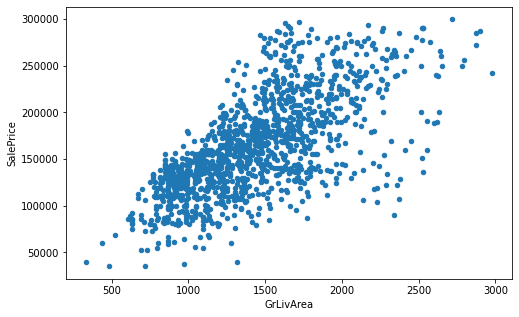

In [2]:
# plotar gráfico de dispersão.
fig, ax = plt.subplots(figsize=(8,5))
df.plot.scatter(x='GrLivArea', y='SalePrice', ax=ax)
plt.show()

### Regressão Linear Simples com o `scikit-learn`

Uma vez que você tenha feito toda uma análise exploratória, definido variáveis e preparado os dados adequadamente, chegou o momento de construir a Regressão Linear Simples.

Em competições do Kaggle, normalmente são fornecidos dados de treino e teste. Já no mundo real, você deve dividir o seu conjunto entre *train* e *test* de maneira que eles sejam mutuamente exclusivos.

Essa etapa é de extrema importância, pois vai tornar o modelo mais genérico e com melhor precisão em relação aos dados novos que venham a ser entrada do mesmo. Neste *dataset*, eu vou separar 20% dos dados para o teste no final.



In [3]:
# importar bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Eu vou separar a variável dependente (`SalePrice`) da nossa *feature*, e usar a função `train_test_split` para fazer a divisão entre dados de treino e teste.

In [13]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LinearRegression

# 2. Instanciar e escolher os hyperparameters
model = LinearRegression()

# 3. Separar os dados entre feature matrix e target vector - mas atenção com 1-feature (reshape)
X = df['GrLivArea']
X.values.reshape(-1,1)
y = df['SalePrice']

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

y_train = y_train.reshape(-1, 1)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)

AttributeError: ignored

Mais importante que se desesperar é entender o que aconteceu. A mensagem de erro acima é por causa do `sklearn.pipeline` do pacote. Ela acontece porque passamos apenas uma variável (*feature*) na variável `X`. Veja esta parte da mensagem do erro:


> *...if your data has a single feature or array.reshape(1, -1)*

Uma coisa que você deve se lembrar é que o `scikit-learn` espera duas coisas nesta etapa:

* Que a variável `X` seja sempre um `np.array` com **duas dimensões**
* Que a variável `y` seja sempre um `np.array` com **uma dimensão**

Olhe os `prints` abaixo para ver as dimensões de cada variável nossa e ver que não estão de acordo com o que o pacote espera.

In [11]:
print("df:\t\t",df.shape)

print("X:\t\t",X.shape)

print("X (reshape):\t",X.values.reshape(-1,1).shape)

print("y:\t\t", y.shape)

df:		 (1338, 2)
X:		 (1338,)
X (reshape):	 (1338, 1)
y:		 (1338,)


Isso é fácil de resolver. Quando for preciso mudar a dimensão de um *array* para atender a condição acima, use `.reshape(-1,1)`.

In [14]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LinearRegression

# 2. Escolher os hyperparameters
model = LinearRegression()

# 3. Separar os dados entre feature matrix e target vector
X = df['GrLivArea'].values.reshape(-1,1)
y = df['SalePrice']

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

LinearRegression()

Se estamos falando de Regressão Linear, estamos falando de construir reta. Essa reta possui coeficientes associados com os ângulos de inclinação e intercepto. Neste caso específico da Regressão Linear Simples, temos apenas um coeficiente de regressão.

Para obtermos os **coeficiente de regressão** e **intercepto**, basta acessar os atributos do modelo diretamente da variável `ml_model`.

In [15]:
# imprimir os coeficientes
print("Coeficiente:\t", model.coef_)
print("Intercepto:\t", model.intercept_)

Coeficiente:	 [81.42644831]
Intercepto:	 47565.92360023262


Como estamos trabalhando com um problema de baixa dimensionalidade, é possível plotar a nossa reta, obtida pelo modelo de *Machine Learning* sobre os dados do nosso *dataset*. Veja como ela representa bem nosso conjunto de pontos.

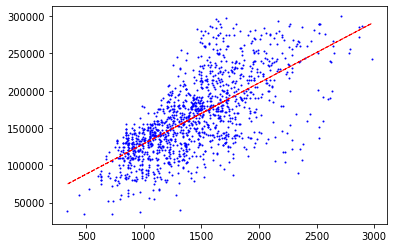

In [16]:
# plotar reta e dados
fig, ax = plt.subplots()
ax.scatter(X, y, s=1, color='blue')
ax.plot(X, (model.coef_ * X + model.intercept_), '--r', linewidth=1)

Com o modelo treinado, ele já está pronto para fazer previsões em cima de dados novos. Como separamos lá em cima dos dados de teste na variável `y_test`, vamos fazer as previsões usando o método `predict()` e armazenar na variável `y_pred`.

In [17]:
# 5. Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)

In [ ]:
y_pred

Tem uma frase muito conhecida na área de Comando e Controle (C2) que diz que "você não controla o que não pode medir".

Um modelo de *Machine Learning* deve ser quantificável, seja em termos de desempenho ou precisão. No caso de modelos de Regressão, 
Vamos testar o desempenho do modelo em cima do nosso conjunto de testes usando as métricas abaixo:

* ***R-Squared -*** métrica popularmente usada para calcular a acurácia do seu modelo. Basicamente, calcula como o seu modelo se encaixa aos seus dados, quantificando a qualidade entre 0 e 1. No caso, a melhor pontuação que seu modelo pode atingir é 1.

* ***Mean Absolut Error (MAE) -*** é a média absoluta do erro, representada pela média das somas dos erros individuais (distâncias entre pontos e retas).

* ***Mean Squared Error (MSE) -*** é a média dos quadrados dos error e provavelmente a métrica mais conhecida. Tende a penalizar exponencialmente os erros, tratando diferentemente erros pequenos e grandes.

In [19]:
# avaliar o desempenho do modelo
print("R2 Score:\t", r2_score(y_test, y_pred))
print("MAE:\t\t", mean_absolute_error(y_test, y_pred))
print("MSE:\t\t", mean_squared_error(y_test, y_pred))

R2 Score:	 0.43975474353545896
MAE:		 30055.50882437404
MSE:		 1556949049.757808


## Regressão Linear Múltipla

O raciocínio usado na Regressão Linear Múltipla é exatamente o mesmo que vimos com a anterior. A diferença é que temos mais variáveis independentes para considerar no nosso modelo.

Para demonstrar como implementá-la, usaremos um *dataset* mais completo que o  anterior.

Mantivemos as 1460 entradas, porém temos agora 34 *features*. Vamos importar o arquivo e dar uma olhada nas primeiras entradas.

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# importar o arquivo
df = pd.read_csv("/content/ENG438/ames/precificacao_housing_plus.csv")

# ver as primeiras entradas
print("Tamanho de df: {}\n".format(df.shape))

df.drop('Id', axis=1, inplace=True)
df.head()

Tamanho de df: (1460, 35)



,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000




Exatamente da mesma maneira, vou dividir os dados entre teste-treino, construir o modelo e executar o método `fit(X_train, y_train)`.

In [45]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LinearRegression

# 2. Escolher os hyperparameters
model = LinearRegression()

# 3. Separar os dados entre feature matrix e target vector - mas atenção com 1-feature (reshape)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)

Dê uma paradinha agora e compare com o exemplo da Regressão Linear Simples. Qual a diferença? 

Quando tentamos passar uma única *feature*, era passada uma estrutura de apenas uma dimensão, o que fazia o `scikit-learn` a dar um erro. No entanto, quando usamos mais de uma *feature*, já temos objetos de duas dimensões sem a necessidade de redimensionar. Veja os `prints` abaixo para ver as dimensões de cada variável nossa e comparar com o exemplo anterior.

In [46]:
print("df:\t\t",df.shape)

print("X:\t\t",X.shape)

print("y:\t\t", y.shape)

df:		 (1460, 34)
X:		 (1460, 33)
y:		 (1460,)


Se na Regressão Linear Simples tínhamos apenas um coeficiente e um intercepto, agora temps um coeficiente para cada variável. Para obtermos os **coeficientes de regressão** e o **intercept**, podemos acessar os atributos do modelo diretamente da variável `ml_model`.


In [47]:
# imprimir os coeficientes
print("Coeficiente:\t", model.coef_)
print("Intercepto:\t", model.intercept_)

Coeficiente:	 [-1.61615264e+02  3.54173880e-01  1.74850648e+04  4.24381149e+03
  3.99694957e+02  1.32738848e+02  9.19728335e+00 -2.27437762e+00
 -4.68808348e-01  6.45409738e+00  2.71768580e+01  2.09580075e+01
 -1.76135388e+01  3.05213268e+01  9.09324823e+03  5.11841502e+03
  2.72278466e+03 -2.75495325e+03 -1.09560995e+04 -1.42385000e+04
  5.49075457e+03  2.76762860e+03  1.11357155e+04 -2.82323751e+00
  3.03221692e+01  1.35374069e+01  1.75956451e+01  2.21198063e+01
  6.21582794e+01 -1.50948349e+02 -8.19101803e-01  1.41963643e+02
 -9.98858374e+02]
Intercepto:	 892153.5640252563


In [56]:
import statsmodels.api as sm
mod1 = sm.OLS(y,X)
result = mod1.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              1447.
Date:                Tue, 11 Oct 2022   Prob (F-statistic):                        0.00
Time:                        13:31:49   Log-Likelihood:                         -17336.
No. Observations:                1460   AIC:                                  3.473e+04
Df Residuals:                    1429   BIC:                                  3.490e+04
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [57]:
from sklearn.feature_selection import f_regression

model.fit(X,y)
params = np.append(model.intercept_,model.coef_)
predictions = model.predict(X)

newX = np.append(np.ones((len(X),1)), X, axis=1)
newX = np.float64(newX)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b
f_test = f_regression(X, y)
f_test /= np.max(f_test)

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coeficientes"],myDF3["Erro padrão"],myDF3["Teste t"],myDF3["p- valor"],  = [params,sd_b,ts_b,p_values]
print(myDF3)

    Coeficientes   Erro padrão  Teste t  p- valor
0    502595.0777  1.427885e+06    0.352     0.725
1      -162.6729  2.648400e+01   -6.142     0.000
2         0.3962  1.020000e-01    3.895     0.000
3     17905.0672  1.195718e+03   14.974     0.000
4      4418.7948  1.033427e+03    4.276     0.000
5       346.6535  6.120600e+01    5.664     0.000
6       137.0739  6.637500e+01    2.065     0.039
7        11.8336  1.228625e+08    0.000     1.000
8        -2.7283  1.241719e+08   -0.000     1.000
9         0.7877  1.241719e+08    0.000     1.000
10        9.8931  1.237370e+08    0.000     1.000
11       18.8377           NaN      NaN       NaN
12       18.9464           NaN      NaN       NaN
13       -6.0003           NaN      NaN       NaN
14       31.7838           NaN      NaN       NaN
15     8534.8941  2.634450e+03    3.240     0.001
16     2467.2005  4.130127e+03    0.597     0.550
17     3577.4891  2.843352e+03    1.258     0.209
18    -1326.8616  2.689881e+03   -0.493     0.622


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


Vamos testar o desempenho do modelo em cima do nosso conjunto de testes. Para isso, vou colocar a variável `X_test` como argumento do `ml_model.predict()`, salvar as previsões e verificar o desempenho em cima das métricas já apresentadas.

In [48]:
# verificar desempenho do modelo
print("R2 Score:\t", r2_score(y_test, y_pred))
print("MAE:\t\t", mean_absolute_error(y_test, y_pred))
print("MSE:\t\t", mean_squared_error(y_test, y_pred))

R2 Score:	 0.7482085778239075
MAE:		 23639.12042531875
MSE:		 1824700032.9483438


In [49]:
y_pred2 = model.predict(X_train)
print("R2 Score:\t", r2_score(y_train, y_pred2))
print("MAE:\t\t", mean_absolute_error(y_train, y_pred2))
print("MSE:\t\t", mean_squared_error(y_train, y_pred2))

R2 Score:	 0.8214939676919174
MAE:		 21008.21625773905
MSE:		 1082334428.1738214


Veja como todas as métricas avaliadas tiveram uma melhora significativa. Uma vez que o modelo tinha à disposição mais *features* para treinar, conseguiu se tornar mais preciso também.

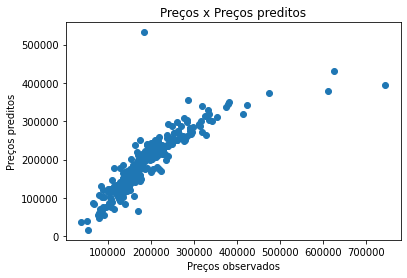

In [50]:
# Diagnóstico do Modelo 2
plt.scatter(y_test, y_pred)
plt.xlabel("Preços observados")
plt.ylabel("Preços preditos")
plt.title("Preços x Preços preditos")
plt.show()

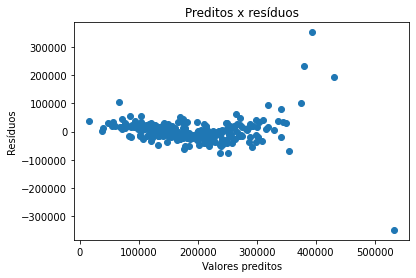

In [51]:
# Checando resíduos
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel("Valores preditos")
plt.ylabel("Resíduos")
plt.title("Preditos x resíduos") 
plt.show()